<a href="https://colab.research.google.com/github/MoisesMartinPerez/dataset-examen/blob/main/Actividad_3_5_%E2%80%93_Clasificaci%C3%B3n_de_vinos_Nasser_Mois%C3%A9s_Mart%C3%ADn_P%C3%A9rez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autor: Nasser Moisés MArtín Pérez

#1. Importación de los datasets (utilizar el dataset winequality-red.csv)


In [3]:
import zipfile
import pandas as pd
import os

# Update the zip_path to the correct location in Colab
zip_path = "/content/wine+quality.zip"  # Assuming you uploaded the file to /content/

# Carpeta de extracción (misma ubicación que el ZIP)
extract_folder = os.path.dirname(zip_path)

# Extraer el contenido del ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)  # Extrae en la misma carpeta
    dataset_name = zip_ref.namelist()[0]  # Obtiene el primer archivo extraído

# Construir la ruta completa del dataset
file_path = os.path.join(extract_folder, dataset_name)

# Cargar el dataset en un DataFrame
df = pd.read_csv(file_path, sep=';')  # Usamos ';' como separador

# Mostrar las primeras filas
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

#2. Mostrar la matriz de correlación de variables.


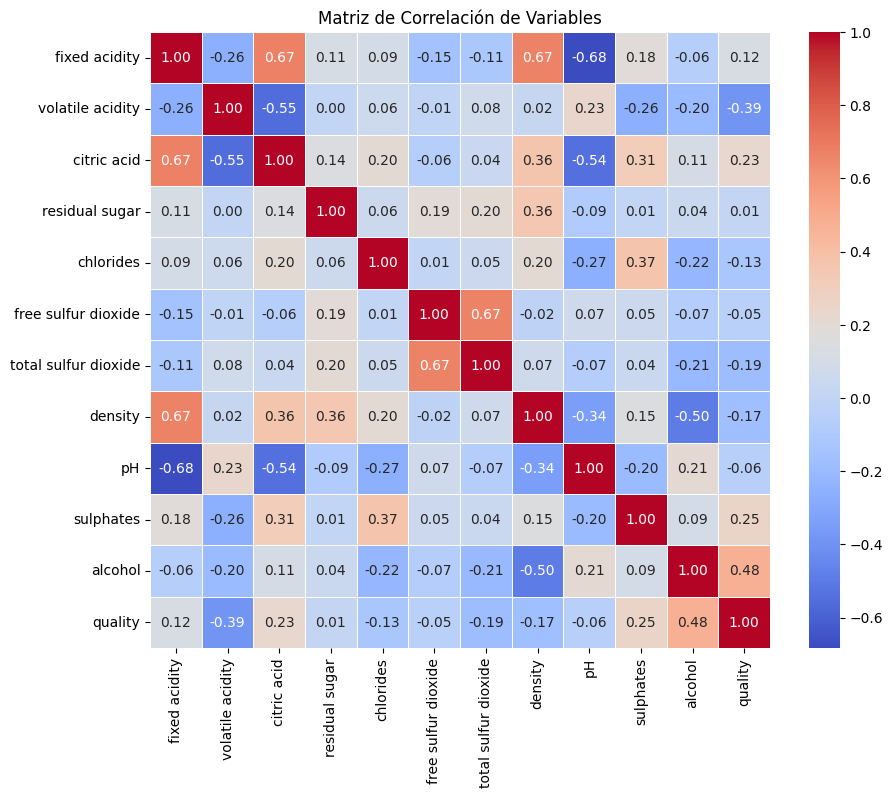

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Mostrar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación de Variables")
plt.show()

#3. Aplicar cualquier otra técnica de selección de características que consideres adecuados y justificar tu propuesta.

In [5]:
from sklearn.feature_selection import SelectKBest, f_regression
# Selección de características con SelectKBest
X = df.drop(columns=['quality'])  # Variables predictoras
y = df['quality']  # Variable objetivo

# Aplicamos SelectKBest con f_regression para seleccionar las 5 mejores características
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]

print("Características seleccionadas:", selected_features)

Características seleccionadas: Index(['volatile acidity', 'citric acid', 'total sulfur dioxide', 'sulphates',
       'alcohol'],
      dtype='object')


#Realizar una comparativa de la precisión en el entrenamiento de los diferentes modelos de NaivaBayes y KNN. Aplicando Cross Validation.

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Modelos
models = {
    "Naive Bayes": GaussianNB(),
    "KNN (k=5)": KNeighborsClassifier(n_neighbors=5)
}

# Evaluación de modelos con Cross Validation
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    print(f"{name} - Precisión promedio: {scores.mean():.4f} (+/- {scores.std():.4f})")

Naive Bayes - Precisión promedio: 0.5919 (+/- 0.0366)
KNN (k=5) - Precisión promedio: 0.5239 (+/- 0.0169)


#5. Una vez decides el modelo que consideras mejor, entonces realizar las siguientes tareas:


**a. Entrenarlo y obtener la matriz de confusión.**

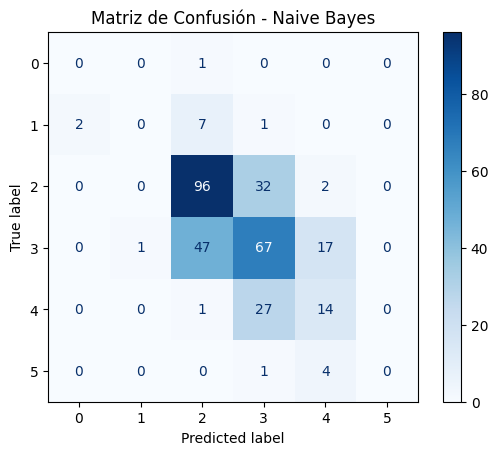

In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Entrenamiento del modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión - Naive Bayes")
plt.show()

**b. Exportar a un fichero los parámetros del modelo entrenado.**

In [10]:
import joblib

# Entrenamiento del modelo Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

# Exportar el modelo entrenado a un fichero
model_path = "/mnt/naive_bayes_model.pkl"
joblib.dump(nb_model, model_path)
print(f"Modelo guardado en: {model_path}")

Modelo guardado en: /mnt/naive_bayes_model.pkl


**c. Importar los parámetros del modelo.**

In [11]:
# Importar el modelo guardado
loaded_model = joblib.load(model_path)
print("Modelo cargado exitosamente")

Modelo cargado exitosamente


**d. Aplicar el modelo (predict) a todos los datos del dataset y obtener la matriz de confusión.**

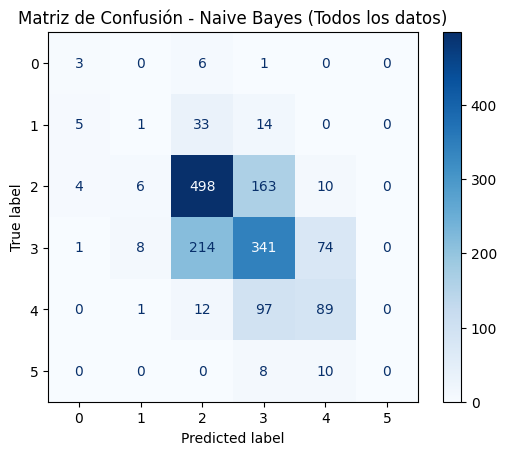

In [12]:
# Aplicar el modelo a todos los datos del dataset
y_pred_all = loaded_model.predict(X_new)

# Matriz de confusión con todos los datos
cm_all = confusion_matrix(y, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all)
disp_all.plot(cmap='Blues')
plt.title("Matriz de Confusión - Naive Bayes (Todos los datos)")
plt.show()

#6. Comparar el resultado obtenido con el valor de calidad indicado en el dataset por medio de una matriz de confusión
**a. Obtener la precisión del resultado obtenido, para determinar si coincide con la precisión que se calculó durante el entrenamiento**


Modelo cargado exitosamente


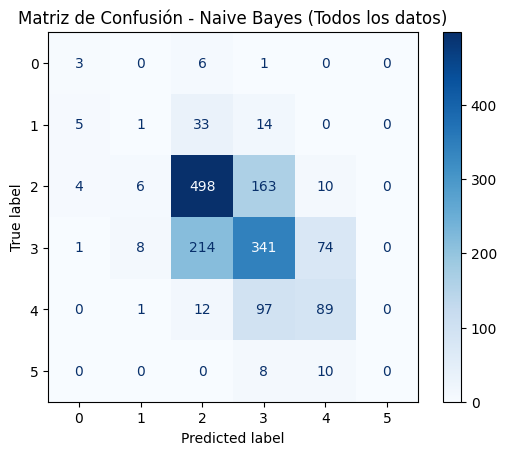

Precisión del modelo en todos los datos: 0.5829


In [16]:
from sklearn.metrics import accuracy_score

# Importar el modelo guardado
loaded_model = joblib.load(model_path)
print("Modelo cargado exitosamente")

# Aplicar el modelo a todos los datos del dataset
y_pred_all = loaded_model.predict(X_new)
# Matriz de confusión con todos los datos
cm_all = confusion_matrix(y, y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=cm_all)
disp_all.plot(cmap='Blues')
plt.title("Matriz de Confusión - Naive Bayes (Todos los datos)")
plt.show()

# Calcular precisión del modelo en todos los datos
accuracy_all = accuracy_score(y, y_pred_all)
print(f"Precisión del modelo en todos los datos: {accuracy_all:.4f}")
